In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [118]:
df1 = pd.read_sas("D:\\ID MINE\\DATA\\bank_data.sas7bdat")

In [119]:
df1

,DATE,WEEday,BankIndex,ALBK,Andhra_Bank,Bank_of_India,Bank_of_Baroda,CanBank,CentBoP,FedBank,HDFC_Bank,ICICI_Bank,IOB,Kodatk,OrientalBank,PNB,SBI,UnionBank,Axis,GST_INd
0,2005-01-03,2.0,3754.260010,77.199997,93.00,96.15,245.65,213.50,18.65,166.35,524.90,371.50,80.80,113.70,335.30,417.75,655.80,109.30,188.95,0.0
1,2005-01-04,3.0,3773.139893,77.199997,93.35,99.15,247.20,226.35,18.50,163.50,519.30,374.35,79.25,118.90,341.95,435.00,649.85,114.30,188.05,0.0
2,2005-01-05,4.0,3607.350098,76.349998,87.50,93.05,228.15,208.80,17.25,157.80,498.50,360.70,76.80,115.40,324.65,423.40,617.50,108.05,183.60,0.0
3,2005-01-06,5.0,3524.649902,72.750000,83.85,91.85,219.55,202.85,17.95,163.80,485.35,354.15,73.90,111.86,310.75,413.95,604.60,103.90,182.50,0.0
4,2005-01-07,6.0,3566.120000,74.050003,84.25,91.00,221.30,205.85,19.45,164.45,489.50,358.75,73.85,113.16,316.85,402.60,615.20,106.30,189.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2007-07-16,2.0,8386.650391,99.900002,94.45,269.75,300.85,293.75,41.85,334.70,1215.50,970.30,136.20,693.05,259.90,572.50,1613.50,156.55,645.65,1.0
661,2007-07-17,3.0,8351.820313,101.300003,94.70,264.85,302.40,286.45,41.25,337.15,1199.60,974.60,134.00,683.25,255.75,573.45,1579.80,151.05,650.50,1.0
662,2007-07-18,4.0,8371.910156,101.949997,95.70,266.45,300.30,283.90,40.00,332.50,1194.05,982.45,130.25,707.45,259.45,560.85,1574.95,149.65,655.00,1.0
663,2007-07-19,5.0,8453.969727,101.900000,95.35,264.55,304.50,285.55,40.15,329.70,1211.95,989.55,132.20,732.40,259.25,580.70,1595.60,150.35,649.90,1.0


In [120]:
df = df1[["DATE","HDFC_Bank"]]

In [121]:
df

,DATE,HDFC_Bank
0,2005-01-03,524.90
1,2005-01-04,519.30
2,2005-01-05,498.50
3,2005-01-06,485.35
4,2005-01-07,489.50
...,...,...
660,2007-07-16,1215.50
661,2007-07-17,1199.60
662,2007-07-18,1194.05
663,2007-07-19,1211.95


In [122]:
df.set_index('DATE',inplace=True)

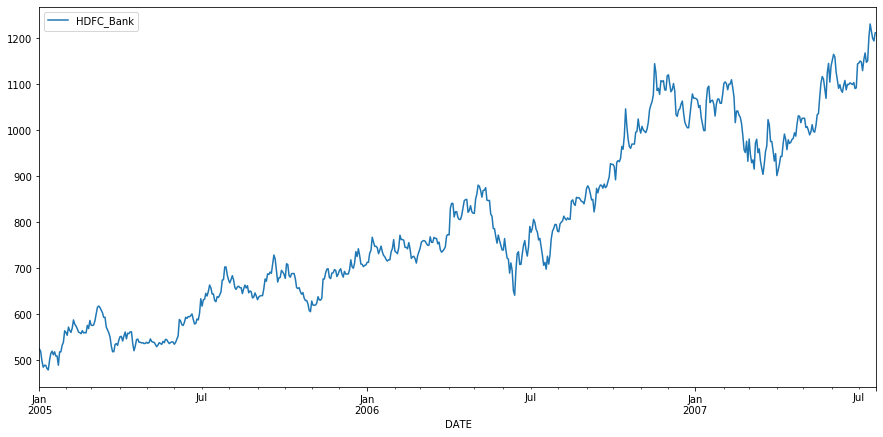

In [123]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [124]:
from statsmodels.tsa.stattools import adfuller

In [125]:
test_result=adfuller(df['HDFC_Bank'])

In [126]:
test_result

(-0.33381976320131534,
 0.9205759868073874,
 10,
 654,
 {'1%': -3.440388459298194,
  '5%': -2.8659694611921034,
  '10%': -2.569128861019929},
 5415.170228692602)

In [127]:
df['Sales First Difference'] = df['HDFC_Bank'] - df['HDFC_Bank'].shift(1)
df['Seasonal First Difference']=df['Sales First Difference']-df['Sales First Difference'].shift(5)

C:\Users\Veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
adfuller(df['Seasonal First Difference'].dropna())

(-9.702104492843125,
 1.0654262482908014e-16,
 19,
 639,
 {'1%': -3.4406250605731623,
  '5%': -2.8660736839408383,
  '10%': -2.5691843911285486},
 5477.619292999677)

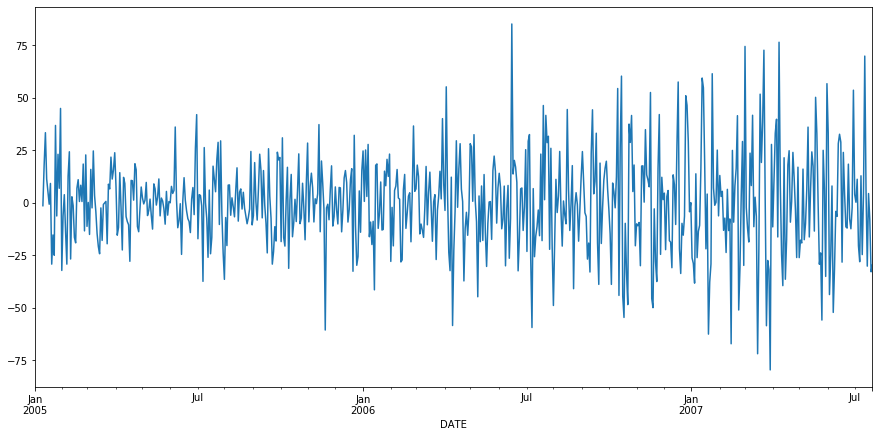

In [129]:
df['Seasonal First Difference'].plot()

In [130]:
df

,HDFC_Bank,Sales First Difference,Seasonal First Difference
DATE,,,
2005-01-03,524.90,NaN,NaN
2005-01-04,519.30,-5.60,NaN
2005-01-05,498.50,-20.80,NaN
2005-01-06,485.35,-13.15,NaN
2005-01-07,489.50,4.15,NaN
...,...,...,...
2007-07-16,1215.50,-15.50,-30.25
2007-07-17,1199.60,-15.90,4.35
2007-07-18,1194.05,-5.55,-8.10


DATE
2005-01-03      NaN
2005-01-04      NaN
2005-01-05      NaN
2005-01-06      NaN
2005-01-07      NaN
2005-01-10      NaN
2005-01-11      NaN
2005-01-12      NaN
2005-01-13      NaN
2005-01-14      NaN
2005-01-17    13.29
2005-01-18    13.43
2005-01-19    11.66
2005-01-20    -0.87
2005-01-21    -6.20
Name: Seasonal First Difference, dtype: float64
DATE
2005-01-03          NaN
2005-01-04          NaN
2005-01-05          NaN
2005-01-06          NaN
2005-01-07          NaN
2005-01-10          NaN
2005-01-11          NaN
2005-01-12          NaN
2005-01-13          NaN
2005-01-14          NaN
2005-01-17    13.321571
2005-01-18    13.130242
2005-01-19    12.955520
2005-01-20    16.535137
2005-01-21    15.936005
Name: Seasonal First Difference, dtype: float64


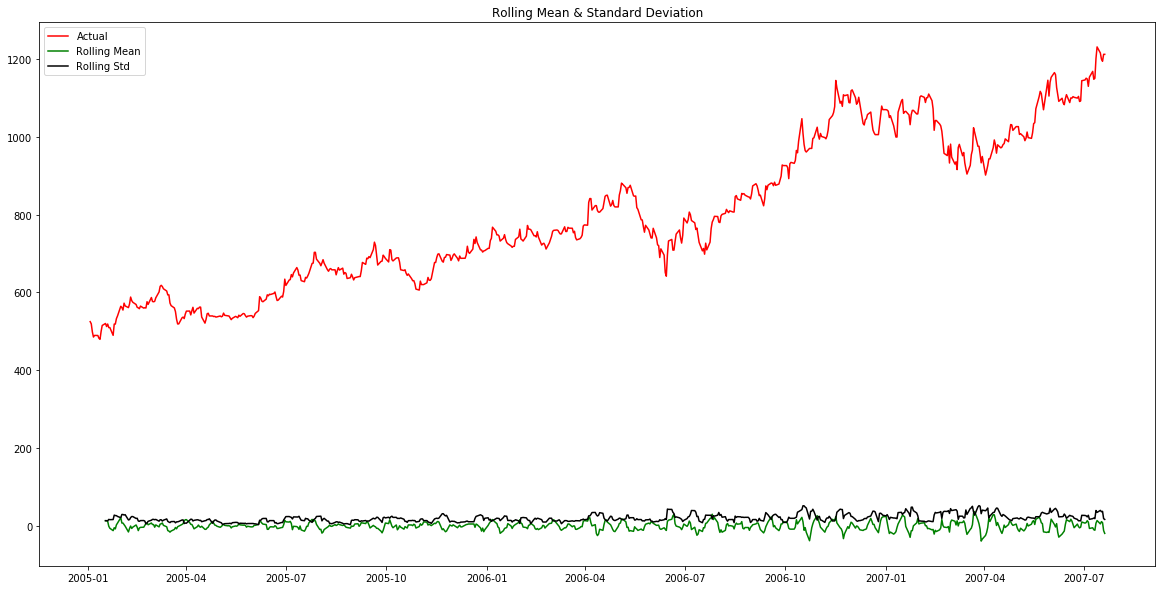

In [131]:
rolmean=df['Seasonal First Difference'].rolling(window=5).mean()
rolstd=df['Seasonal First Difference'].rolling(window=5).std()
print(rolmean.head(15))
print(rolstd.head(15))


plt.figure(figsize=(20,10))
actual=plt.plot(df['HDFC_Bank'], color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

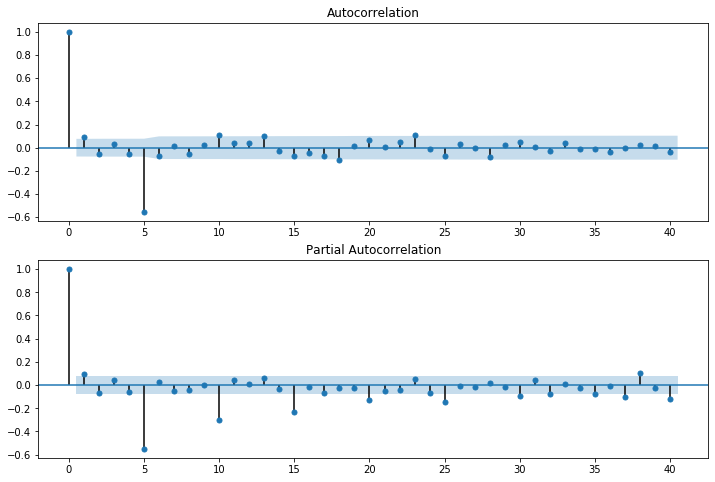

In [132]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)


In [133]:
df

,HDFC_Bank,Sales First Difference,Seasonal First Difference
DATE,,,
2005-01-03,524.90,NaN,NaN
2005-01-04,519.30,-5.60,NaN
2005-01-05,498.50,-20.80,NaN
2005-01-06,485.35,-13.15,NaN
2005-01-07,489.50,4.15,NaN
...,...,...,...
2007-07-16,1215.50,-15.50,-30.25
2007-07-17,1199.60,-15.90,4.35
2007-07-18,1194.05,-5.55,-8.10


In [134]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['HDFC_Bank'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\Veena\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Veena\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.HDFC_Bank   No. Observations:                  664
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2787.621
Method:                       css-mle   S.D. of innovations             16.107
Date:                Tue, 22 Jun 2021   AIC                           5583.241
Time:                        18:47:46   BIC                           5601.234
Sample:                    01-04-2005   HQIC                          5590.213
                         - 07-20-2007                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0337      0.659      1.568      0.117      -0.259       2.326
ar.L1.D.HDFC_Bank    -0.5556      0.200     -2.781      0.005      -0.947      -0.164
ma.L1.D.HDFC_Bank     0.6409      0.184      3.489      0.000       0.281       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8000           +0.0000j            1.8000            0.5000
MA.1           -1.5603           +0.0000j            1.5603            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\Veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


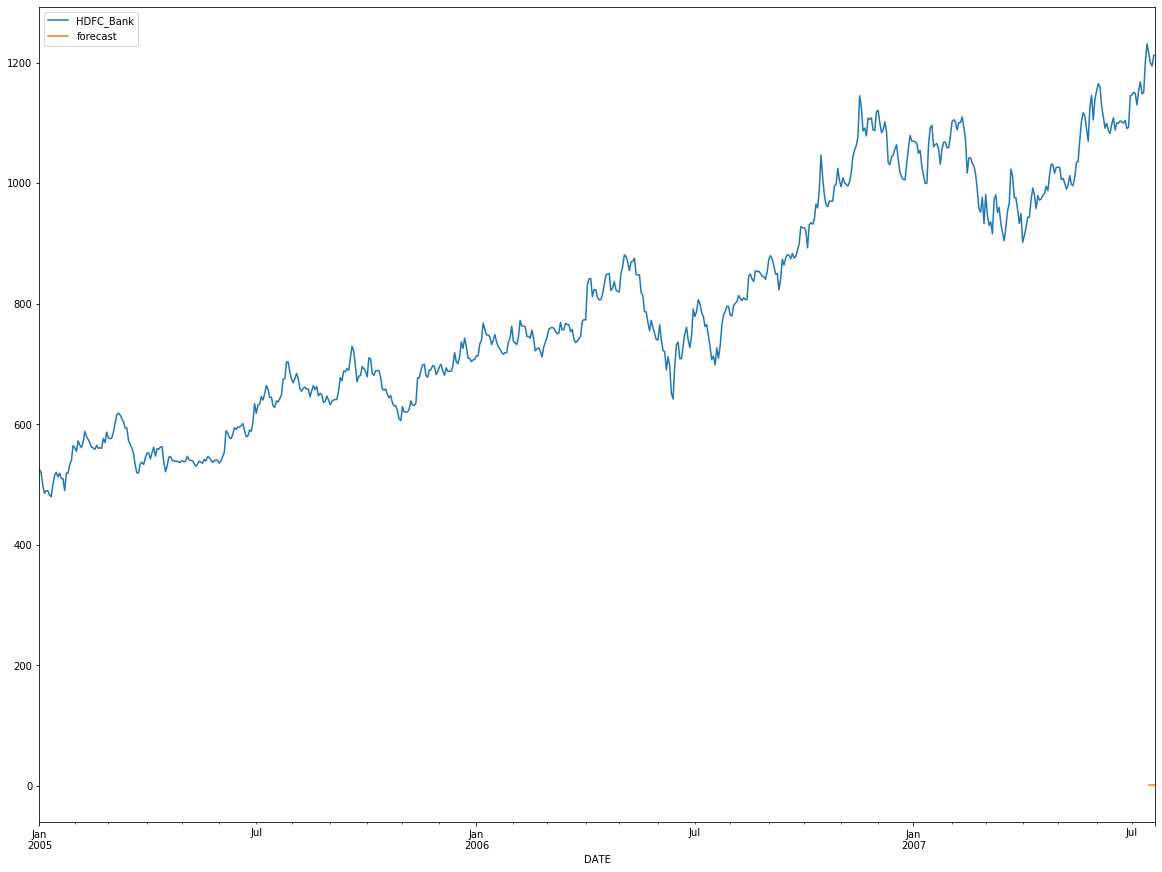

In [135]:
df['forecast']=model_fit.predict(start=660,end=665,dynamic=True)
df[['HDFC_Bank','forecast']].plot(figsize=(20,15))

In [136]:
df

,HDFC_Bank,Sales First Difference,Seasonal First Difference,forecast
DATE,,,,
2005-01-03,524.90,NaN,NaN,NaN
2005-01-04,519.30,-5.60,NaN,NaN
2005-01-05,498.50,-20.80,NaN,NaN
2005-01-06,485.35,-13.15,NaN,NaN
2005-01-07,489.50,4.15,NaN,NaN
...,...,...,...,...
2007-07-16,1215.50,-15.50,-30.25,1.223451
2007-07-17,1199.60,-15.90,4.35,0.928220
2007-07-18,1194.05,-5.55,-8.10,1.092241


C:\Users\Veena\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Veena\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


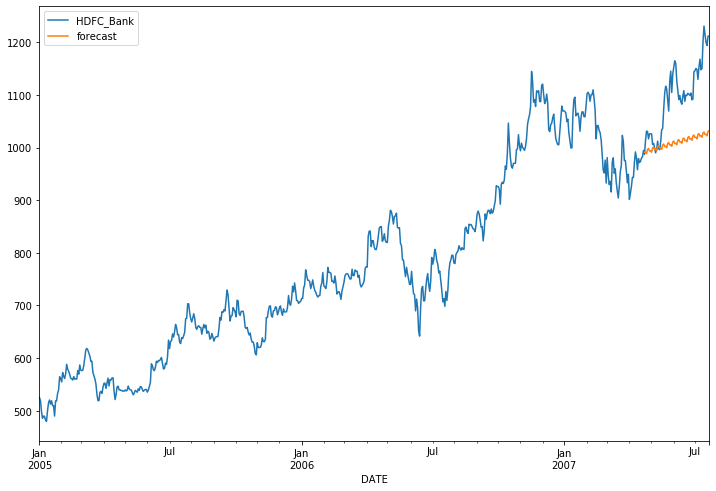

In [137]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['HDFC_Bank'],order=(1, 1, 1),seasonal_order=(1,1,1,5))
results=model.fit()
df['forecast']=results.predict(start=600,end=665,dynamic=True)
df[['HDFC_Bank','forecast']].plot(figsize=(12,8))

In [138]:
df.tail(100)

,HDFC_Bank,Sales First Difference,Seasonal First Difference,forecast
DATE,,,,
2007-03-05,929.85,-17.85,-12.05,NaN
2007-03-06,935.65,5.80,-18.75,NaN
2007-03-07,915.65,-20.00,23.60,NaN
2007-03-08,972.30,56.65,8.15,NaN
2007-03-09,980.55,8.25,41.65,NaN
...,...,...,...,...
2007-07-16,1215.50,-15.50,-30.25,1024.788701
2007-07-17,1199.60,-15.90,4.35,1025.326166
2007-07-18,1194.05,-5.55,-8.10,1022.414519


C:\Users\Veena\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


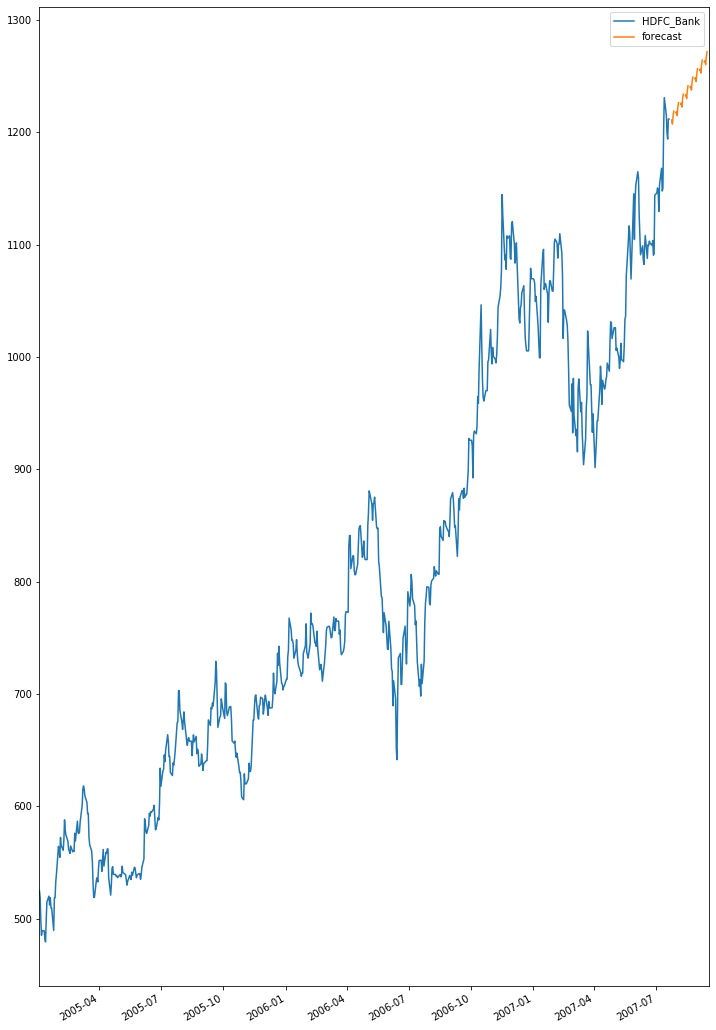

In [154]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,60)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 666, end = 756, dynamic= True)
future_df[['HDFC_Bank', 'forecast']].plot(figsize=(12, 20))

In [155]:
future_df.tail(40)

,HDFC_Bank,Sales First Difference,Seasonal First Difference,forecast
2007-08-09,NaN,NaN,NaN,1229.990588
2007-08-10,NaN,NaN,NaN,1234.064400
2007-08-11,NaN,NaN,NaN,NaN
2007-08-12,NaN,NaN,NaN,NaN
2007-08-13,NaN,NaN,NaN,1232.747461
2007-08-14,NaN,NaN,NaN,1233.645790
2007-08-15,NaN,NaN,NaN,1230.126307
2007-08-16,NaN,NaN,NaN,1237.548063
2007-08-17,NaN,NaN,NaN,1241.621929
2007-08-18,NaN,NaN,NaN,NaN


In [156]:
df

,HDFC_Bank,Sales First Difference,Seasonal First Difference,forecast
DATE,,,,
2005-01-03,524.90,NaN,NaN,NaN
2005-01-04,519.30,-5.60,NaN,NaN
2005-01-05,498.50,-20.80,NaN,NaN
2005-01-06,485.35,-13.15,NaN,NaN
2005-01-07,489.50,4.15,NaN,NaN
...,...,...,...,...
2007-07-16,1215.50,-15.50,-30.25,1024.788701
2007-07-17,1199.60,-15.90,4.35,1025.326166
2007-07-18,1194.05,-5.55,-8.10,1022.414519


In [157]:
df2=df1[['DATE','HDFC_Bank']]

In [158]:
df2.set_index('DATE',inplace=True)

In [159]:
df2

,HDFC_Bank
DATE,
2005-01-03,524.90
2005-01-04,519.30
2005-01-05,498.50
2005-01-06,485.35
2005-01-07,489.50
...,...
2007-07-16,1215.50
2007-07-17,1199.60
2007-07-18,1194.05


In [160]:
df_train=df2[0:600]
df_test=df2[600:665]

In [161]:
df_train

,HDFC_Bank
DATE,
2005-01-03,524.90
2005-01-04,519.30
2005-01-05,498.50
2005-01-06,485.35
2005-01-07,489.50
...,...
2007-04-16,971.50
2007-04-17,973.75
2007-04-18,980.00


In [162]:
df_model=ARIMA(df_train['HDFC_Bank'], order=(1,1,1))

C:\Users\Veena\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Veena\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B wil

In [163]:
df_model_git=df_model.fit()

In [164]:
df_model_git.aic

5010.014935415079

In [165]:
df_forecast=df_model_git.forecast(steps=65)[0]

In [166]:
df_forecast

array([ 995.98083244,  996.46524967,  997.41543095,  998.1093123 ,
        998.94422999,  999.70153842, 1000.50155355, 1001.27806811,
       1002.06751452, 1002.84984481, 1003.63609095, 1004.42018229,
       1005.20545936, 1005.99008395, 1006.77506759, 1007.55985365,
       1008.34474844, 1009.12958339, 1009.91445127, 1010.69930103,
       1011.48416076, 1012.26901501, 1013.05387227, 1013.83872787,
       1014.62358439, 1015.4084404 , 1016.19329669, 1016.97815283,
       1017.76300905, 1018.54786523, 1019.33272143, 1020.11757762,
       1020.90243381, 1021.68729   , 1022.47214619, 1023.25700239,
       1024.04185858, 1024.82671477, 1025.61157096, 1026.39642715,
       1027.18128335, 1027.96613954, 1028.75099573, 1029.53585192,
       1030.32070811, 1031.10556431, 1031.8904205 , 1032.67527669,
       1033.46013288, 1034.24498908, 1035.02984527, 1035.81470146,
       1036.59955765, 1037.38441384, 1038.16927004, 1038.95412623,
       1039.73898242, 1040.52383861, 1041.3086948 , 1042.09355

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
np.sqrt(mean_squared_error(df_test['HDFC_Bank'],df_forecast))

92.26517852532338